# Deep Learning Project



# Classifiers

## Data preprocessing




In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import keras
from keras.utils import to_categorical
import os
import torch
from torch import nn
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,TensorDataset
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import requests


In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

--2023-11-26 16:36:37--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz.1’

cifar-100-python.ta 100%[===================>] 161.17M  46.5MB/s    in 3.9s    

2023-11-26 16:36:41 (41.4 MB/s) - ‘cifar-100-python.tar.gz.1’ saved [169001437/169001437]



In [ ]:
!tar -xzvf cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [ ]:
train_data = unpickle('/content/cifar-100-python/train')

In [ ]:
#type of items in each file
for item in train_data:
    print(item, type(train_data[item]))


filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [ ]:
test_data = unpickle('/content/cifar-100-python/test')
meta_data = unpickle('/content/cifar-100-python/meta')


In [ ]:
fine_labels=meta_data['fine_label_names']


In [ ]:
print("Fine labels:", meta_data['fine_label_names'], "\n")
print("Coarse labels:", meta_data['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [ ]:
X_train= train_data['data']
X_test=test_data['data']
y_train = train_data['fine_labels']
y_test = test_data['fine_labels']

print((X_train.shape))

(50000, 3072)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
data = train_data['data'].reshape(len(train_data['data']),3,32,32).transpose(0,2,3,1)

Image number selected : 49739
Shape of image : (32, 32, 3)
Image category number: 11
Image category name: Large_omnivores_and_herbivores
Image subcategory number: 21
Image subcategory name: Chimpanzee


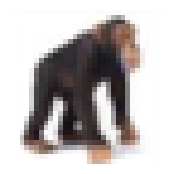

In [ ]:
#storing coarse labels along with its number code in a dataframe
category = pd.DataFrame(meta_data['coarse_label_names'], columns=['SuperClass'])
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(meta_data['fine_label_names'], columns=['SubClass'])

#generating a random number to display a random image from the dataset along with the label's number and name

#setting the figure size
rcParams['figure.figsize'] = 2,2

#generating a random number
imageId = np.random.randint(0, len(data))

#showing the image at that id
plt.imshow(data[imageId])

#setting display off for the image
plt.axis('off')

#displaying the image id
print("Image number selected : {}".format(imageId))

#displaying the shape of the image
print("Shape of image : {}".format(data[imageId].shape))

#displaying the category number
print("Image category number: {}".format(train_data['coarse_labels'][imageId]))

#displaying the category name
print("Image category name: {}".format(category.iloc[train_data['coarse_labels'][imageId]][0].capitalize()))

#displaying the subcategory number
print("Image subcategory number: {}".format(train_data['fine_labels'][imageId]))

#displaying the subcategory name
print("Image subcategory name: {}".format(subCategory.iloc[train_data['fine_labels'][imageId]][0].capitalize()))


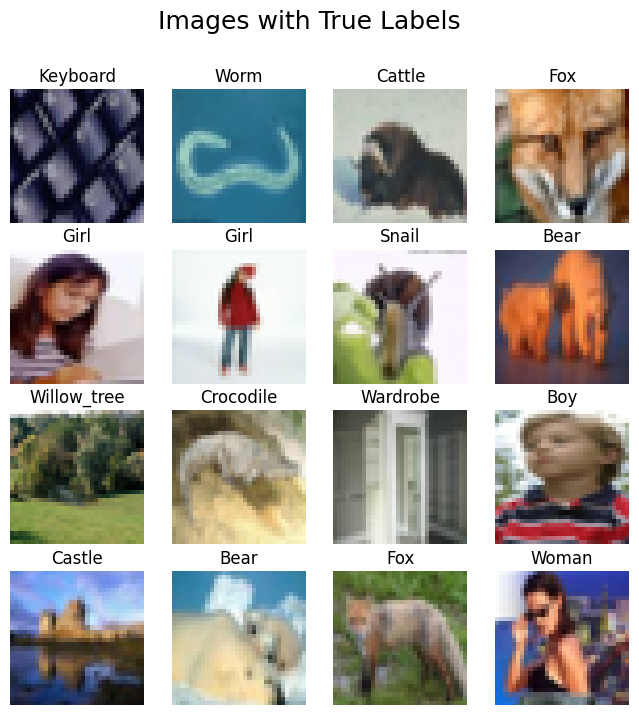

In [ ]:
#16 random images to display at a time along with their true labels

#setting the figure size
rcParams['figure.figsize'] = 8,8

#number of columns and rows in which images needs to be displayed
num_row = 4
num_col = 4

#to get 4 * 4 = 16 images together
imageId = np.random.randint(0, len(data), num_row * num_col)

#creating subplots
fig, axes = plt.subplots(num_row, num_col)

#main title of the plot
plt.suptitle('Images with True Labels', fontsize=18)

#displaying images as subplots
for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(data[imageId[k]])
        axes[i,j].set_title(subCategory.iloc[train_data['fine_labels'][imageId[k]]][0].capitalize())
        axes[i,j].axis('off')

In [ ]:
#perform one-hot encoding to the data
n_classes = 100
y_train_encoded = to_categorical(y_train, n_classes)
y_test_encoded = to_categorical(y_test, n_classes)

## KNN classifier



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [ ]:

scores = {}

for k in [1,3]:

    knn_clf = KNeighborsClassifier(n_neighbors = k)

    start_time=time.time()

    knn_clf.fit(X_train, y_train)

    stop_time=time.time()

    print("Training time:", stop_time-start_time, "seconds")

    start_time=time.time()

    test_score = knn_clf.score(X_test, y_test)

    stop_time=time.time()

    print("Testing time:", stop_time-start_time, "seconds")
    # training.append(training_score)

    scores[k] = [test_score]
    print(scores)

Training time: 0.15047478675842285 seconds
Testing time: 123.1213264465332 seconds
{1: [0.1755]}
Training time: 0.1186068058013916 seconds
Testing time: 107.84917330741882 seconds
{1: [0.1755], 3: [0.1479]}


## Nearest Centroids



In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
ncc = NearestCentroid()

start_time = time.time()

ncc.fit(X_train , y_train)

stop_time = time.time()

print("Training time:", stop_time-start_time ,"seconds")

start_time = time.time()

score = ncc.score(X_test, y_test)

stop_time = time.time()

print("Testing time:", stop_time - start_time, "seconds")
print(score)

Training time: 0.46196532249450684 seconds
Testing time: 0.44421887397766113 seconds
0.1004


## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train.shape

(50000, 3072)

In [ ]:
print("Number of features before PCA: ", X_train.shape[1])
print("Number of features after PCA: ", X_train_pca.shape[1])

Number of features before PCA:  3072
Number of features after PCA:  202


In [ ]:
start_time = time.time()
print(y_train)
ncc.fit(X_train_pca , y_train)

stop_time = time.time()

print("Training time:", stop_time-start_time ,"seconds")

start_time = time.time()

score = ncc.score(X_test_pca, y_test)

stop_time = time.time()

print("Testing time:", stop_time - start_time, "seconds")
print(score)

[19, 29, 0, 11, 1, 86, 90, 28, 23, 31, 39, 96, 82, 17, 71, 39, 8, 97, 80, 71, 74, 59, 70, 87, 59, 84, 64, 52, 42, 64, 8, 17, 47, 65, 21, 22, 81, 11, 24, 84, 78, 45, 49, 97, 56, 76, 11, 90, 89, 78, 73, 14, 87, 9, 71, 6, 47, 20, 98, 47, 36, 55, 72, 43, 51, 35, 83, 33, 27, 53, 92, 50, 15, 89, 36, 18, 89, 46, 33, 42, 39, 64, 75, 38, 23, 42, 66, 77, 49, 18, 46, 15, 35, 69, 95, 83, 75, 99, 73, 93, 55, 39, 4, 97, 61, 93, 51, 69, 56, 84, 59, 64, 94, 4, 11, 33, 68, 38, 20, 33, 34, 32, 46, 53, 88, 67, 70, 64, 53, 64, 8, 96, 87, 30, 20, 30, 66, 19, 76, 87, 52, 62, 35, 63, 40, 4, 99, 63, 74, 53, 26, 95, 48, 27, 33, 29, 39, 79, 32, 46, 64, 28, 85, 32, 82, 78, 39, 54, 28, 66, 65, 72, 21, 64, 62, 72, 0, 44, 7, 12, 19, 11, 31, 61, 79, 45, 81, 79, 98, 43, 46, 67, 80, 68, 74, 48, 81, 94, 86, 69, 39, 73, 2, 46, 49, 63, 43, 14, 49, 68, 65, 41, 37, 45, 36, 21, 77, 37, 39, 8, 9, 62, 86, 39, 19, 54, 39, 28, 11, 89, 90, 90, 79, 66, 81, 21, 79, 40, 29, 22, 13, 25, 11, 38, 10, 96, 54, 65, 39, 40, 42, 48, 48, 51

In [ ]:

scores = {}

for k in [1,3]:

    knn_clf = KNeighborsClassifier(n_neighbors = k)

    start_time=time.time()

    knn_clf.fit(X_train_pca, y_train)

    stop_time=time.time()

    print("Training time:", stop_time-start_time, "seconds")

    start_time=time.time()

    test_score = knn_clf.score(X_test_pca, y_test)

    stop_time=time.time()

    print("Testing time:", stop_time-start_time, "seconds")


    scores[k] = [test_score]
    print(scores)

Training time: 0.06812930107116699 seconds
Testing time: 11.29465103149414 seconds
{1: [0.1857]}
Training time: 0.06385445594787598 seconds
Testing time: 10.06216287612915 seconds
{1: [0.1857], 3: [0.1568]}


## Plot

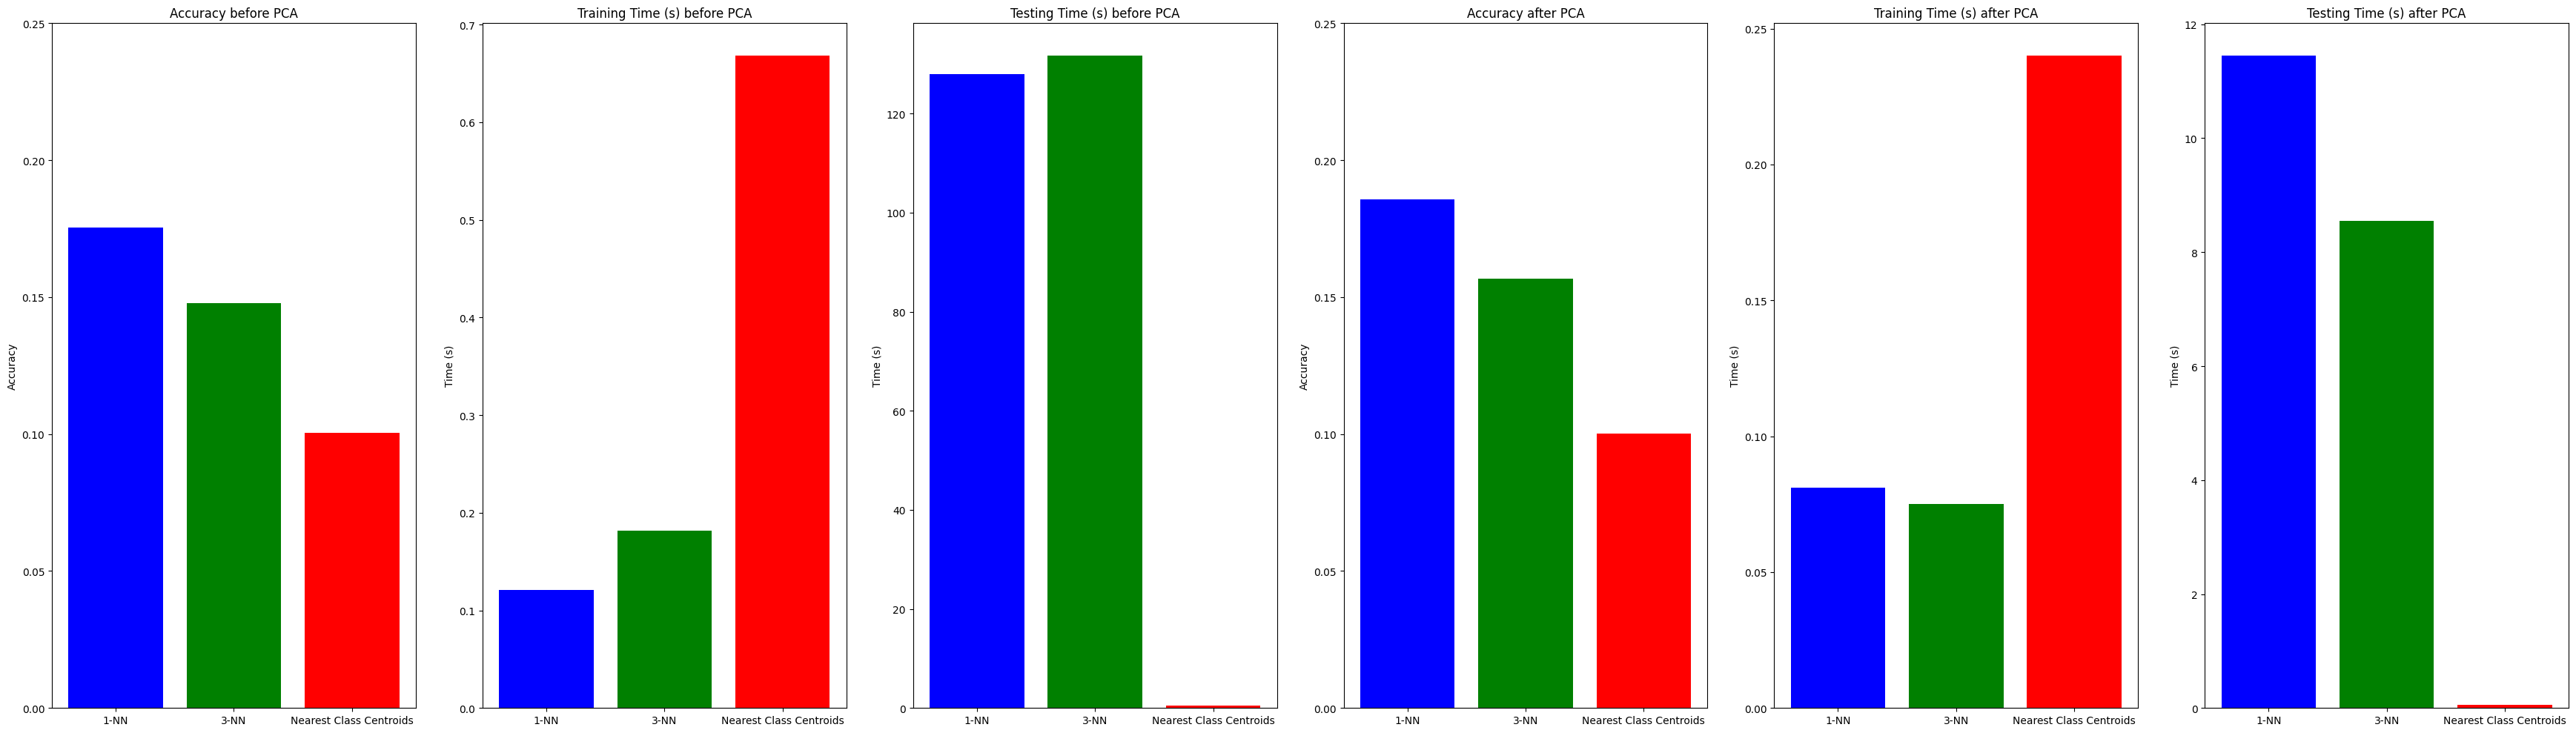

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(35, 10))

accuracies_before= [0.1755,0.1479,0.1004]
accuracies_after= [0.1857,0.1568,0.1003]

training_time_before=[0.121,0.182,0.668]
training_time_after= [0.081,0.075, 0.240]

testing_time_before=[127.967,131.666,0.445]
testing_time_after= [11.446,8.551, 0.05 ]



classifiers=["1-NN","3-NN","Nearest Class Centroids"]
colors= {
    "1-NN": "blue",
    "3-NN": "green",
    "Nearest Class Centroids": "red"
}
# Accuracy before PCA
accuracy_colors = [colors[classifier] for classifier in classifiers]
axs[0].bar(classifiers, accuracies_before, color=accuracy_colors)
axs[0].set_ylim(0, 0.25)
axs[0].set_title("Accuracy before PCA")
axs[0].set_ylabel("Accuracy")

# Training Time before PCA
training_time_colors = [colors[classifier] for classifier in classifiers]
axs[1].bar(classifiers, training_time_before, color=training_time_colors)
axs[1].set_title("Training Time (s) before PCA")
axs[1].set_ylabel("Time (s)")

# Testing Time before PCA
testing_time_colors = [colors[classifier] for classifier in classifiers]
axs[2].bar(classifiers, testing_time_before, color=testing_time_colors)
axs[2].set_title("Testing Time (s) before PCA")
axs[2].set_ylabel("Time (s)")

# Accuracy after PCA
axs[3].bar(classifiers, accuracies_after, color=accuracy_colors)
axs[3].set_ylim(0, 0.25)
axs[3].set_title("Accuracy after PCA")
axs[3].set_ylabel("Accuracy")

# Training Time after PCA
axs[4].bar(classifiers, training_time_after, color=training_time_colors)
axs[4].set_title("Training Time (s) after PCA")
axs[4].set_ylabel("Time (s)")

# Testing Time after PCA
axs[5].bar(classifiers, testing_time_after, color=testing_time_colors)
axs[5].set_title("Testing Time (s) after PCA")
axs[5].set_ylabel("Time (s)")


plt.tight_layout()

plt.show()

# Neural Network Models

## Import Libraries and Prepare DataLoaders

In [ ]:
import os
import torch
from torch import nn
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,TensorDataset
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.utils import to_categorical


In [ ]:
# Set fixed random number seed
torch.manual_seed(42)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                              ])

batch_size = 150

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Create a DataLoader to handle batching and shuffling
trainloader_pca = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=False, num_workers=2)

# Get all the images and labels
for train_images, train_labels in trainloader_pca:
    break  # Break after the first iteration to get the entire dataset


# Flatten the images
flattened_images = train_images.view(train_images.size(0), -1).numpy()
print("Train" + str(flattened_images.shape))
# Perform PCA
n_components = 0.95  # Choose the number of principal components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(flattened_images)
print(pca_result.shape)
pca_dataset = TensorDataset(torch.Tensor(pca_result), train_labels)

pca_dataloader_train = DataLoader(pca_dataset, batch_size=64, shuffle=True, num_workers=2)


test_loader_pca = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False, num_workers=2)
for test_images, test_labels in test_loader_pca:
    break  # Break after the first iteration to get the entire dataset
print(test_images.shape)
# Flatten the images
flattened_images_test = test_images.view(test_images.size(0), -1).numpy()
print("Test"+ str(flattened_images_test.shape))


pca_result_test = pca.transform(flattened_images_test)
print(pca_result_test.shape)

pca_dataset_test = TensorDataset(torch.Tensor(pca_result_test), test_labels)

pca_dataloader_test = DataLoader(pca_dataset_test, batch_size=64, shuffle=True, num_workers=2)


Train(50000, 3072)
(50000, 202)
torch.Size([10000, 3, 32, 32])
Test(10000, 3072)
(10000, 202)


## Training and Evaluation loops

In [ ]:
loss_function = nn.CrossEntropyLoss()

In [ ]:
import time
def train_Adam(net,trainloader,testloader,epochs=10,lr=1e-4):
  start_time=time.time()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  loss_values=[]
  train_accuracy_values=[]
  test_accuracy_values=[]
  epoch_values=[]
  evaluation=0
  epoch_values.append(0)
  train_accuracy_values.append(evaluate(net,trainloader))
  test_accuracy_values.append(evaluate(net,testloader))
  # Run the training loop
  for epoch in range(0, epochs):

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    running_loss = 0.0

    # Iterate over the DataLoader for training data
    for images,labels in trainloader:

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = net(images)

        # Compute loss
        loss = loss_function(outputs, labels)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch - Training loss:", running_loss/len(trainloader))

    loss_values.append(running_loss / len(trainloader))
    evaluation=evaluate(net,trainloader)

    train_accuracy_values.append(evaluation)
    evaluation=evaluate(net,testloader)

    test_accuracy_values.append(evaluation)
    print("Epoch - Evaluation:", evaluation.item())

    epoch_values.append(epoch+1)



# Create the plots for the training loss and the accuracy over epochs
  stop_time=time.time()
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  axs[0].plot(epoch_values[1:],loss_values, label='Training Loss')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss')
  axs[0].set_title('Training Loss over Epochs')

  axs[1].plot(epoch_values, train_accuracy_values, label='Training Accuracy')

# Plot test accuracy
  axs[1].plot(epoch_values, test_accuracy_values, label='Test Accuracy')

# Set labels and title
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Accuracy')
  axs[1].set_title('Accuracy over Epochs')

# Add legend
  axs[1].legend()

# Show the plot
  plt.show()

  print("TRAINING TIME: ", (stop_time-start_time))
  plt.show()


In [ ]:

def train_SGD(net,trainloader,testloader,epochs=10,lr=1e-4):
  start_time=time.time()
  optimizer = torch.optim.SGD(net.parameters(), lr=lr)
  loss_values=[]
  train_accuracy_values=[]
  test_accuracy_values=[]
  epoch_values=[]
  evaluation=0
  epoch_values.append(0)
  train_accuracy_values.append(evaluate(net,trainloader))
  test_accuracy_values.append(evaluate(net,testloader))
  # Run the training loop
  for epoch in range(0, epochs):

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    running_loss = 0.0

    # Iterate over the DataLoader for training data
    for images,labels in trainloader:

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = net(images)

        # Compute loss
        loss = loss_function(outputs, labels)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch - Training loss:", running_loss/len(trainloader))

    loss_values.append(running_loss / len(trainloader))
    evaluation=evaluate(net,trainloader)

    train_accuracy_values.append(evaluation)
    evaluation=evaluate(net,testloader)

    test_accuracy_values.append(evaluation)
    print("Epoch - Evaluation:", evaluation.item())

    epoch_values.append(epoch+1)



# Create the plots for the training loss and the accuracy over epochs
  stop_time=time.time()
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  axs[0].plot(epoch_values[1:],loss_values, label='Training Loss')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss')
  axs[0].set_title('Training Loss over Epochs')

  axs[1].plot(epoch_values, train_accuracy_values, label='Training Accuracy')

# Plot test accuracy
  axs[1].plot(epoch_values, test_accuracy_values, label='Test Accuracy')

# Set labels and title
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Accuracy')
  axs[1].set_title('Accuracy over Epochs')

# Add legend
  axs[1].legend()

# Show the plot
  plt.show()

  print("TRAINING TIME: ", (stop_time-start_time))
  plt.show()


In [ ]:
def evaluate(net, loader):
  correct,total=0.0,0.0
  for data, label in loader:

    y=net(data)
    y=y.argmax(dim=1)
    correct+= torch.sum(y==label)
    total+=len(label)
  return 100*correct/total

## Simple MLP models

### Model Implementation

In [ ]:
from torch.ao.nn.quantized.modules import Softmax
class MLP_simple(nn.Module):

  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 100),
      nn.Softmax(dim=1)
    )


  def forward(self, x):

    return self.layers(x)

In [ ]:
class MLP_simple_PCA(nn.Module):

  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(202, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 100),
      nn.Softmax(dim=1)
    )


  def forward(self, x):

    return self.layers(x)

In [ ]:
# Initialize the MLPs
mlp = MLP_simple()
mlp_pca=MLP_simple_PCA()

### Model training

Starting epoch 1
Epoch - Training loss: 4.59337711905291
Epoch - Evaluation: 4.110000133514404
Starting epoch 2
Epoch - Training loss: 4.575622468651412
Epoch - Evaluation: 5.53000020980835
Starting epoch 3
Epoch - Training loss: 4.557715287465535
Epoch - Evaluation: 7.139999866485596
Starting epoch 4
Epoch - Training loss: 4.54794438584836
Epoch - Evaluation: 7.71999979019165
Starting epoch 5
Epoch - Training loss: 4.541879928040648
Epoch - Evaluation: 8.020000457763672
Starting epoch 6
Epoch - Training loss: 4.537047140612573
Epoch - Evaluation: 8.479999542236328
Starting epoch 7
Epoch - Training loss: 4.532957392538379
Epoch - Evaluation: 8.859999656677246
Starting epoch 8
Epoch - Training loss: 4.528497575999734
Epoch - Evaluation: 9.289999961853027
Starting epoch 9
Epoch - Training loss: 4.524384474326037
Epoch - Evaluation: 9.529999732971191
Starting epoch 10
Epoch - Training loss: 4.521040839349438
Epoch - Evaluation: 9.779999732971191
Starting epoch 11
Epoch - Training loss: 4.

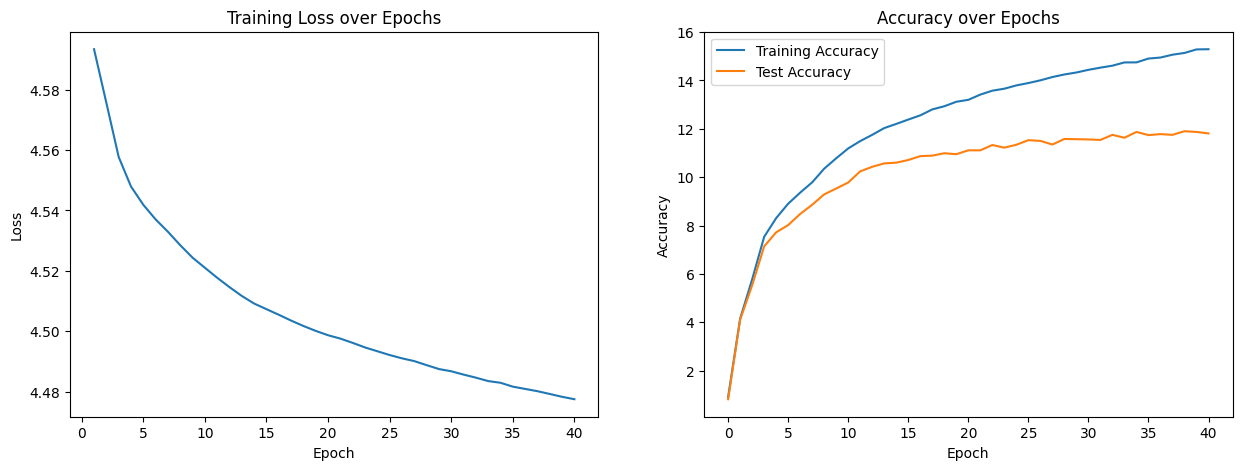

TRAINING TIME:  1442.7966771125793


In [ ]:
train_Adam(mlp,trainloader,testloader,epochs=40,lr=((1e-4)))

Starting epoch 1
Epoch - Training loss: 4.603812271371827
Epoch - Evaluation: 3.2799999713897705
Starting epoch 2
Epoch - Training loss: 4.582128580878763
Epoch - Evaluation: 4.769999980926514
Starting epoch 3
Epoch - Training loss: 4.565096586866452
Epoch - Evaluation: 6.53000020980835
Starting epoch 4
Epoch - Training loss: 4.55318232692416
Epoch - Evaluation: 7.360000133514404
Starting epoch 5
Epoch - Training loss: 4.545261975139608
Epoch - Evaluation: 7.949999809265137
Starting epoch 6
Epoch - Training loss: 4.53843910736806
Epoch - Evaluation: 8.600000381469727
Starting epoch 7
Epoch - Training loss: 4.532944511574552
Epoch - Evaluation: 9.229999542236328
Starting epoch 8
Epoch - Training loss: 4.52811969454636
Epoch - Evaluation: 9.649999618530273
Starting epoch 9
Epoch - Training loss: 4.5236786606976445
Epoch - Evaluation: 10.069999694824219
Starting epoch 10
Epoch - Training loss: 4.519634612685884
Epoch - Evaluation: 10.460000038146973
Starting epoch 11
Epoch - Training loss

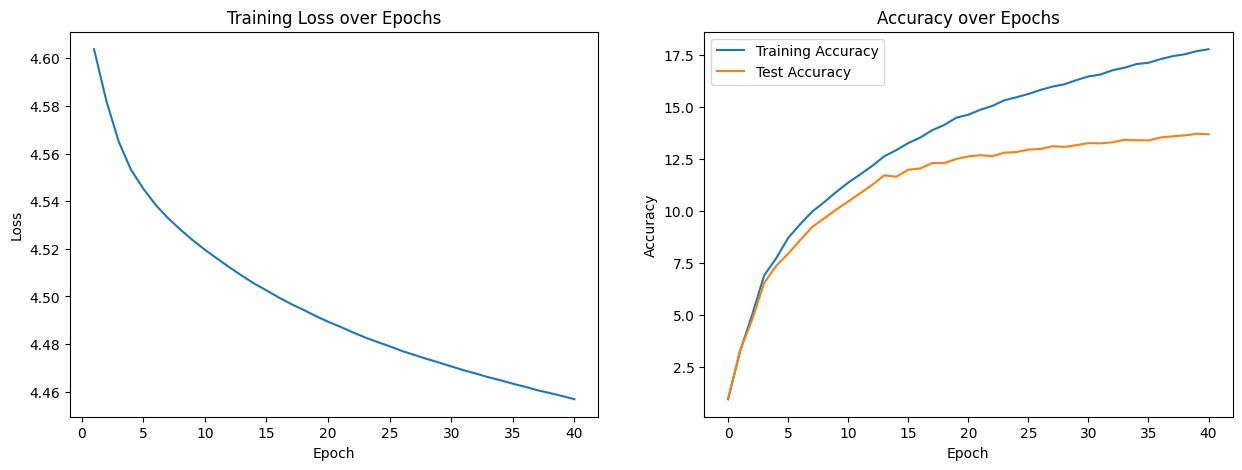

TRAINING TIME:  370.97996401786804


In [ ]:
train_Adam(mlp_pca,pca_dataloader_train,pca_dataloader_test,epochs=40,lr=((1e-4)))

In [ ]:
print(evaluate(mlp,trainloader))
print(evaluate(mlp,testloader))

tensor(15.2900)
tensor(11.8100)


In [ ]:
print(evaluate(mlp_pca,pca_dataloader_train))
print(evaluate(mlp_pca,pca_dataloader_test))

tensor(17.7920)
tensor(13.7000)


Starting epoch 1
Epoch - Training loss: 4.476837470859825
Epoch - Evaluation: 11.90999984741211
Starting epoch 2
Epoch - Training loss: 4.475993848846344
Epoch - Evaluation: 12.029999732971191
Starting epoch 3
Epoch - Training loss: 4.475277238263342
Epoch - Evaluation: 11.890000343322754
Starting epoch 4
Epoch - Training loss: 4.474212627924845
Epoch - Evaluation: 12.020000457763672
Starting epoch 5
Epoch - Training loss: 4.473303250923842
Epoch - Evaluation: 12.100000381469727
Starting epoch 6
Epoch - Training loss: 4.472773891723085
Epoch - Evaluation: 12.069999694824219
Starting epoch 7
Epoch - Training loss: 4.47187471960833
Epoch - Evaluation: 12.15999984741211
Starting epoch 8
Epoch - Training loss: 4.471030142492877
Epoch - Evaluation: 12.260000228881836
Starting epoch 9
Epoch - Training loss: 4.469886191590818
Epoch - Evaluation: 12.229999542236328
Starting epoch 10
Epoch - Training loss: 4.469088951270737
Epoch - Evaluation: 12.369999885559082
Starting epoch 11
Epoch - Traini

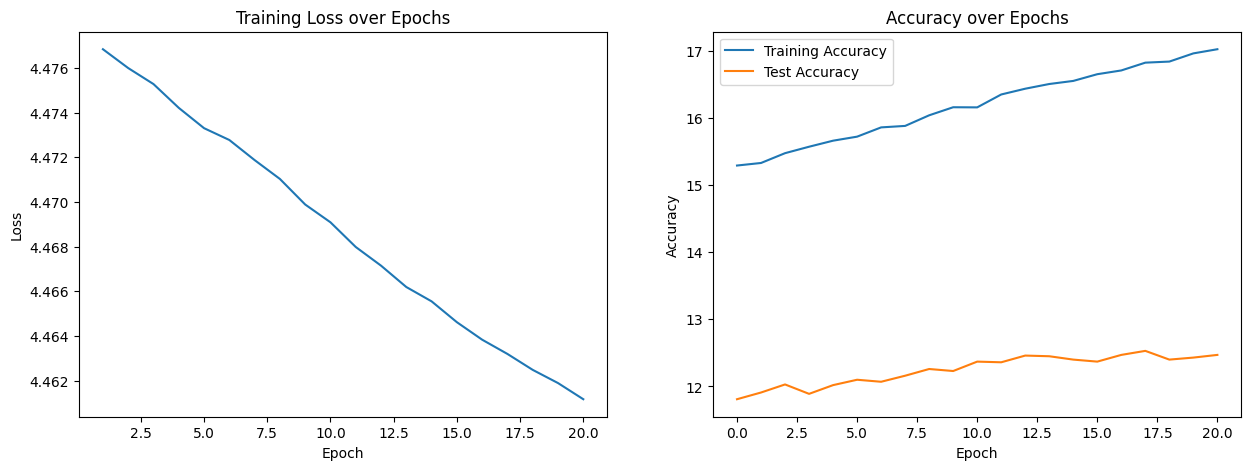

TRAINING TIME:  764.2222943305969


In [ ]:
train_Adam(mlp,trainloader,testloader,epochs=20,lr=((1e-4)))

Starting epoch 1
Epoch - Training loss: 4.455723014938862
Epoch - Evaluation: 13.819999694824219
Starting epoch 2
Epoch - Training loss: 4.45466353460346
Epoch - Evaluation: 13.819999694824219
Starting epoch 3
Epoch - Training loss: 4.4535253157701025
Epoch - Evaluation: 13.8100004196167
Starting epoch 4
Epoch - Training loss: 4.452363927041174
Epoch - Evaluation: 13.670000076293945
Starting epoch 5
Epoch - Training loss: 4.45129324652045
Epoch - Evaluation: 13.8100004196167
Starting epoch 6
Epoch - Training loss: 4.450110758052153
Epoch - Evaluation: 13.800000190734863
Starting epoch 7
Epoch - Training loss: 4.44903915800402
Epoch - Evaluation: 13.880000114440918
Starting epoch 8
Epoch - Training loss: 4.447998631031007
Epoch - Evaluation: 13.84000015258789
Starting epoch 9
Epoch - Training loss: 4.447000723055867
Epoch - Evaluation: 13.960000038146973
Starting epoch 10
Epoch - Training loss: 4.446015464070508
Epoch - Evaluation: 13.970000267028809
Starting epoch 11
Epoch - Training l

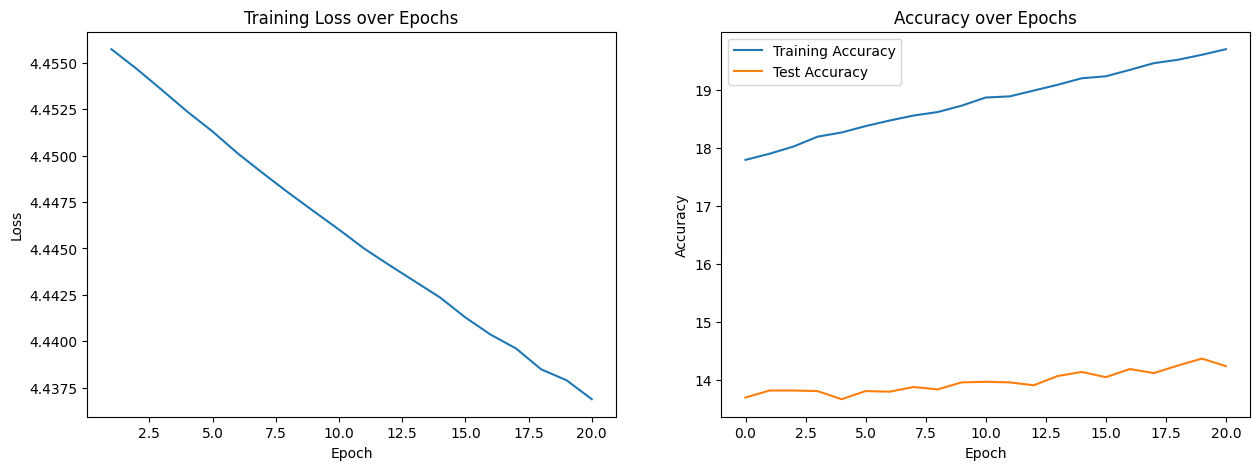

TRAINING TIME:  152.50292873382568


In [ ]:
train_Adam(mlp_pca,pca_dataloader_train,pca_dataloader_test,epochs=20,lr=((1e-4)))

## Advanced MLP models

### Model Implementation

In [ ]:
class MLP_Advanced(nn.Module):

  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 256),
      nn.ReLU(),
      nn.Linear(256, 512),
      nn.ReLU(),
      nn.Linear(512, 100),
      nn.Softmax(dim=1)
    )


  def forward(self, x):

    return self.layers(x)

In [ ]:
class MLP_Advanced_PCA(nn.Module):

  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(202, 256),
      nn.ReLU(),
      nn.Linear(256, 512),
      nn.ReLU(),
      nn.Linear(512, 100),
      nn.Softmax(dim=1)
    )


  def forward(self, x):

    return self.layers(x)

In [ ]:
# Initialize the MLPs
mlp_adv = MLP_Advanced()
mlp_adv_pca=MLP_Advanced_PCA()

### Model training

Starting epoch 1
Epoch - Training loss: 4.568300017339741
Epoch - Evaluation: 7.579999923706055
Starting epoch 2
Epoch - Training loss: 4.532837543658868
Epoch - Evaluation: 10.449999809265137
Starting epoch 3
Epoch - Training loss: 4.511200226709514
Epoch - Evaluation: 12.210000038146973
Starting epoch 4
Epoch - Training loss: 4.496360366215963
Epoch - Evaluation: 12.699999809265137
Starting epoch 5
Epoch - Training loss: 4.486460521549522
Epoch - Evaluation: 13.619999885559082
Starting epoch 6
Epoch - Training loss: 4.478356616939613
Epoch - Evaluation: 13.819999694824219
Starting epoch 7
Epoch - Training loss: 4.471969555951878
Epoch - Evaluation: 14.199999809265137
Starting epoch 8
Epoch - Training loss: 4.466939934713398
Epoch - Evaluation: 14.470000267028809
Starting epoch 9
Epoch - Training loss: 4.461203061178059
Epoch - Evaluation: 14.84000015258789
Starting epoch 10
Epoch - Training loss: 4.4557149296035305
Epoch - Evaluation: 15.109999656677246
Starting epoch 11
Epoch - Trai

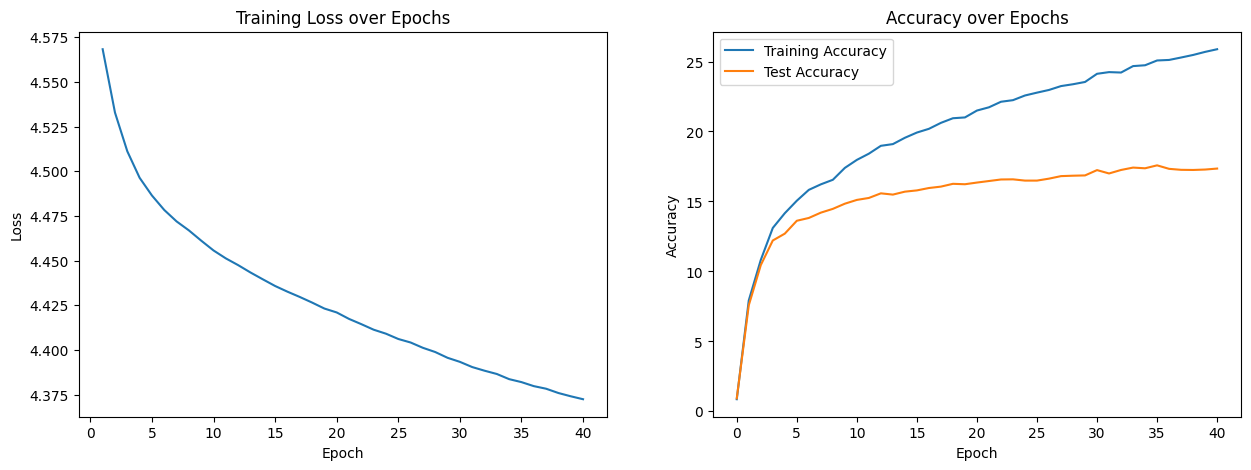

TRAINING TIME:  1772.0959255695343


In [ ]:
train_Adam(mlp_adv,trainloader,testloader,epochs=40,lr=((1e-4)))

Starting epoch 1
Epoch - Training loss: 4.568593031914948
Epoch - Evaluation: 8.84000015258789
Starting epoch 2
Epoch - Training loss: 4.523578207816004
Epoch - Evaluation: 11.90999984741211
Starting epoch 3
Epoch - Training loss: 4.4993480971402215
Epoch - Evaluation: 13.140000343322754
Starting epoch 4
Epoch - Training loss: 4.4854149861104045
Epoch - Evaluation: 13.710000038146973
Starting epoch 5
Epoch - Training loss: 4.47563213887422
Epoch - Evaluation: 14.270000457763672
Starting epoch 6
Epoch - Training loss: 4.467530943853471
Epoch - Evaluation: 14.800000190734863
Starting epoch 7
Epoch - Training loss: 4.4609478446833615
Epoch - Evaluation: 14.770000457763672
Starting epoch 8
Epoch - Training loss: 4.4549489435942276
Epoch - Evaluation: 15.329999923706055
Starting epoch 9
Epoch - Training loss: 4.449160631355422
Epoch - Evaluation: 15.510000228881836
Starting epoch 10
Epoch - Training loss: 4.4442441396396175
Epoch - Evaluation: 15.720000267028809
Starting epoch 11
Epoch - Tr

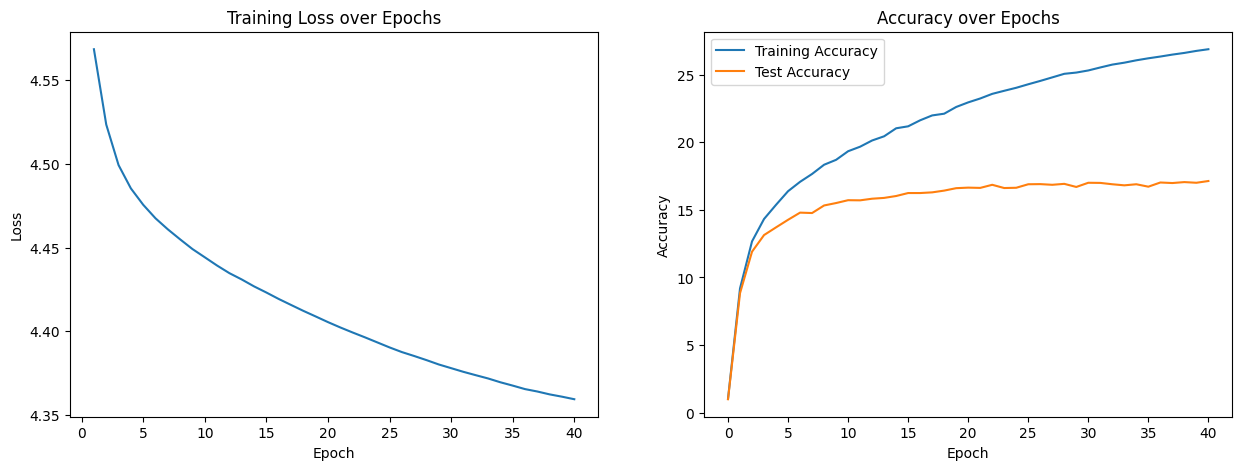

TRAINING TIME:  480.47332549095154


In [ ]:
train_Adam(mlp_adv_pca,pca_dataloader_train,pca_dataloader_test,epochs=40,lr=((1e-4)))

In [ ]:
print(evaluate(mlp_adv,trainloader))
print(evaluate(mlp_adv,testloader))

tensor(25.8780)
tensor(17.3500)


In [ ]:
print(evaluate(mlp_adv_pca,pca_dataloader_train))
print(evaluate(mlp_adv_pca,pca_dataloader_test))

tensor(26.8940)
tensor(17.1400)


## Convolutional Neural Networks

### Model implementation

In [ ]:
from torch.ao.nn.quantized.modules import Softmax
import torch.nn.functional as F
class Conv(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1=nn.Conv2d(3,16, 3)
    self.conv2=nn.Conv2d(16,32,3)
    self.linear1=nn.Linear(6*6*32, 64)
    self.linear2=nn.Linear(64,100)




  def forward(self, x):
    x= self.conv1(x)
    x= F.relu(x)
    x=F.max_pool2d(x,kernel_size=2)

    x= self.conv2(x)
    x= F.relu(x)
    x=F.max_pool2d(x,kernel_size=2)



    x= x.view(-1,6*6*32) # Flatten the data

    x=self.linear1(x)

    x= F.relu(x)
    x=self.linear2(x)


    return x

In [ ]:
# Initialize CNN model
conv=Conv()

### Model training

Starting epoch 1
Epoch - Training loss: 4.459946225503248
Epoch - Evaluation: 5.829999923706055
Starting epoch 2
Epoch - Training loss: 4.053713937005597
Epoch - Evaluation: 10.279999732971191
Starting epoch 3
Epoch - Training loss: 3.8806513690662956
Epoch - Evaluation: 12.100000381469727
Starting epoch 4
Epoch - Training loss: 3.776926620277816
Epoch - Evaluation: 13.609999656677246
Starting epoch 5
Epoch - Training loss: 3.698857554418598
Epoch - Evaluation: 15.260000228881836
Starting epoch 6
Epoch - Training loss: 3.6322858140854066
Epoch - Evaluation: 16.200000762939453
Starting epoch 7
Epoch - Training loss: 3.5763539047298316
Epoch - Evaluation: 17.219999313354492
Starting epoch 8
Epoch - Training loss: 3.524384819818828
Epoch - Evaluation: 17.889999389648438
Starting epoch 9
Epoch - Training loss: 3.4773038932663236
Epoch - Evaluation: 18.8700008392334
Starting epoch 10
Epoch - Training loss: 3.4324660886547522
Epoch - Evaluation: 19.059999465942383
Starting epoch 11
Epoch - T

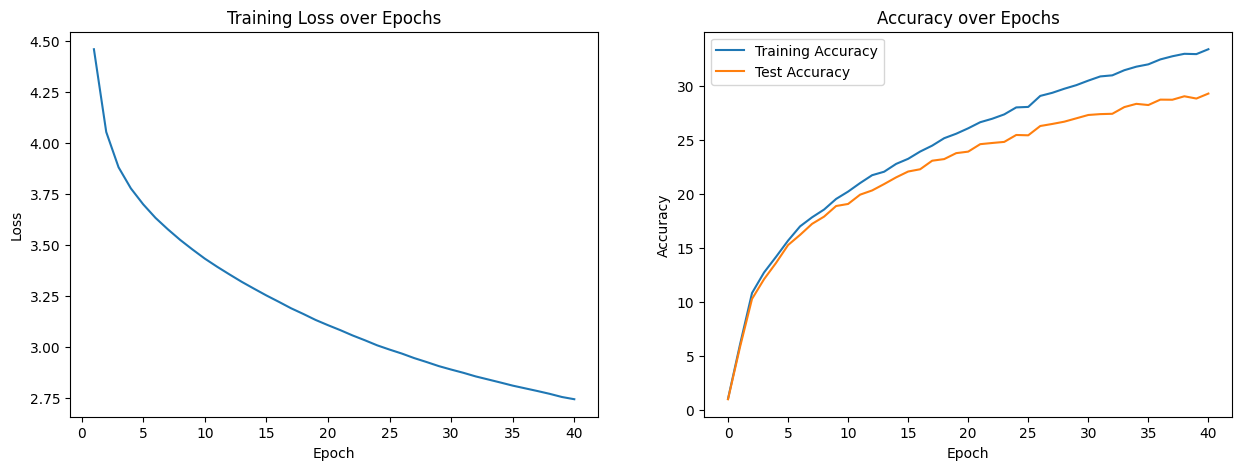

TRAINING TIME:  2835.313592195511


In [ ]:
train_Adam(conv,trainloader,testloader,epochs=40,lr=(1e-4))

Starting epoch 1
Epoch - Training loss: 2.7325395081571475
Epoch - Evaluation: 29.6299991607666
Starting epoch 2
Epoch - Training loss: 2.7196758971242847
Epoch - Evaluation: 29.31999969482422
Starting epoch 3
Epoch - Training loss: 2.708110703679616
Epoch - Evaluation: 29.639999389648438
Starting epoch 4
Epoch - Training loss: 2.6956150203407883
Epoch - Evaluation: 29.670000076293945
Starting epoch 5
Epoch - Training loss: 2.6856900603471403
Epoch - Evaluation: 29.780000686645508
Starting epoch 6
Epoch - Training loss: 2.6738653240089647
Epoch - Evaluation: 29.489999771118164
Starting epoch 7
Epoch - Training loss: 2.6641312887568676
Epoch - Evaluation: 29.790000915527344
Starting epoch 8
Epoch - Training loss: 2.653626616843446
Epoch - Evaluation: 30.31999969482422
Starting epoch 9
Epoch - Training loss: 2.644309497165109
Epoch - Evaluation: 30.520000457763672
Starting epoch 10
Epoch - Training loss: 2.633948822935184
Epoch - Evaluation: 30.969999313354492
Starting epoch 11
Epoch - T

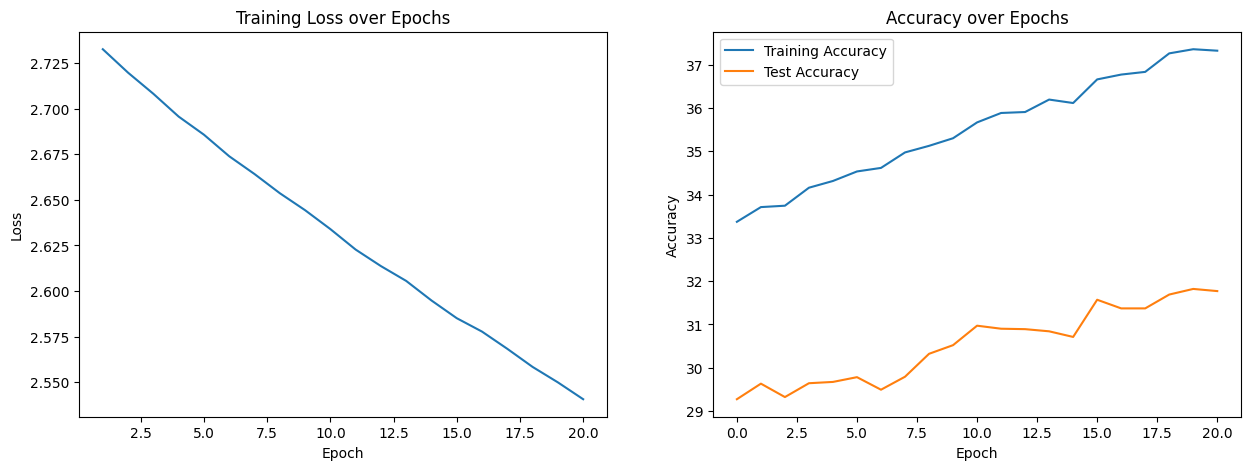

TRAINING TIME:  1398.9925224781036


In [ ]:
train_Adam(conv,trainloader,testloader,epochs=20,lr=(1e-4))

In [ ]:
print(evaluate(conv,trainloader))
print(evaluate(conv,testloader))

tensor(37.3280)
tensor(31.7700)


## Confusion Matrix and Misclassification examples

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
def confusion_matrix_plot(net,data,labels):
  y_pred = net(data)
  y_pred=y_pred.argmax(dim=1)

  cm = confusion_matrix(labels, y_pred)
  cm = np.array(cm)

  plt.figure(figsize=(100, 100))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(100), yticklabels=range(100))
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()


In [ ]:
confusion_matrix_plot(mlp,test_images,test_labels)

Ok
Ok


In [ ]:
print(fine_labels[47],fine_labels[52])

maple_tree oak_tree


In [ ]:
pca_test_images=torch.Tensor(pca_result_test)
confusion_matrix_plot(mlp_pca,pca_test_images,test_labels)

Ok
Ok


In [ ]:
confusion_matrix_plot(mlp_adv,test_images,test_labels)

Ok
Ok


In [ ]:
confusion_matrix_plot(mlp_adv_pca,pca_test_images,test_labels)

Ok
Ok


In [ ]:
print(fine_labels[54],fine_labels[92])

orchid tulip


In [ ]:
confusion_matrix_plot(conv,test_images,test_labels)

Ok
Ok


In [ ]:
print(fine_labels[30],fine_labels[95])

dolphin whale


## Train with SGD

In [ ]:
# Initialize the models

mlp=MLP_simple()
mlp_pca=MLP_simple_PCA()

mlp_adv=MLP_Advanced()
mlp_adv_pca=MLP_Advanced_PCA()

conv= Conv()

Starting epoch 1
Epoch - Training loss: 4.605174420122615
Epoch - Evaluation: 0.8600000143051147
Starting epoch 2
Epoch - Training loss: 4.605170786737681
Epoch - Evaluation: 0.8899999856948853
Starting epoch 3
Epoch - Training loss: 4.60516716762931
Epoch - Evaluation: 0.9100000262260437
Starting epoch 4
Epoch - Training loss: 4.605162739039895
Epoch - Evaluation: 1.0099999904632568
Starting epoch 5
Epoch - Training loss: 4.605158561717964
Epoch - Evaluation: 1.100000023841858
Starting epoch 6
Epoch - Training loss: 4.605155350919255
Epoch - Evaluation: 1.190000057220459
Starting epoch 7
Epoch - Training loss: 4.605151577624018
Epoch - Evaluation: 1.2599999904632568
Starting epoch 8
Epoch - Training loss: 4.605146986281801
Epoch - Evaluation: 1.3300000429153442
Starting epoch 9
Epoch - Training loss: 4.60514277897909
Epoch - Evaluation: 1.4199999570846558
Starting epoch 10
Epoch - Training loss: 4.605138171932654
Epoch - Evaluation: 1.4600000381469727
Starting epoch 11
Epoch - Trainin

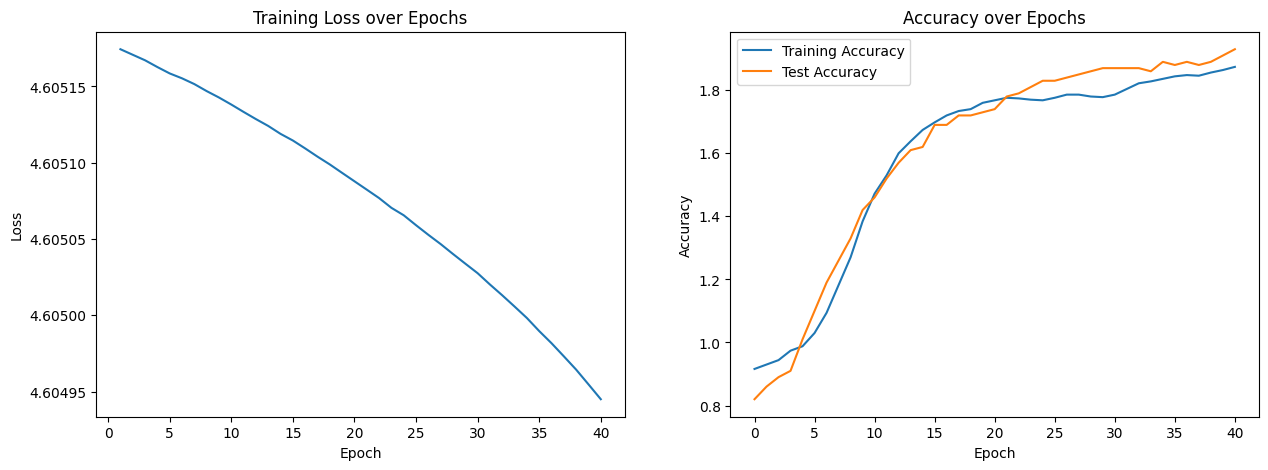

TRAINING TIME:  1259.9147670269012


In [ ]:
train_SGD(mlp,trainloader,testloader,epochs=40,lr=((1e-2)))

Starting epoch 1
Epoch - Training loss: 4.605175609360198
Epoch - Evaluation: 1.0
Starting epoch 2
Epoch - Training loss: 4.60516964889572
Epoch - Evaluation: 0.9900000095367432
Starting epoch 3
Epoch - Training loss: 4.605164278053238
Epoch - Evaluation: 1.0099999904632568
Starting epoch 4
Epoch - Training loss: 4.605158584560463
Epoch - Evaluation: 1.0099999904632568
Starting epoch 5
Epoch - Training loss: 4.605152925331436
Epoch - Evaluation: 1.0199999809265137
Starting epoch 6
Epoch - Training loss: 4.605147397446776
Epoch - Evaluation: 1.0099999904632568
Starting epoch 7
Epoch - Training loss: 4.605141499799169
Epoch - Evaluation: 1.0099999904632568
Starting epoch 8
Epoch - Training loss: 4.605136161792778
Epoch - Evaluation: 1.0099999904632568
Starting epoch 9
Epoch - Training loss: 4.605130139939085
Epoch - Evaluation: 1.0099999904632568
Starting epoch 10
Epoch - Training loss: 4.60512447642709
Epoch - Evaluation: 1.0399999618530273
Starting epoch 11
Epoch - Training loss: 4.605

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
AssertionError: can only test a child process
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch - Evaluation: 1.1399999856948853
Starting epoch 14


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__

    self._shutdown_workers()Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
        if w.is_alive():
self._shutdown_workers()  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
        if w.is_alive():
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.10/multiprocessing/process.py", line 16

Epoch - Training loss: 4.605100668832927


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch - Evaluation: 1.190000057220459
Starting epoch 15


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
self._shutdown_workers()    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
      File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a

Epoch - Training loss: 4.6050943742969075


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child processException ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    
    self._shutdown_workers()if w.is_alive():
  File "/usr/lib/

Epoch - Evaluation: 1.2400000095367432
Starting epoch 16


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    Exception ignored in: self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x79b0853d2a70>
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch - Training loss: 4.6050883081858744
Epoch - Evaluation: 1.3799999952316284
Starting epoch 17
Epoch - Training loss: 4.605082194962187
Epoch - Evaluation: 1.440000057220459
Starting epoch 18
Epoch - Training loss: 4.6050756234608725
Epoch - Evaluation: 1.559999942779541
Starting epoch 19
Epoch - Training loss: 4.605069414584222
Epoch - Evaluation: 1.600000023841858
Starting epoch 20
Epoch - Training loss: 4.605063261386163
Epoch - Evaluation: 1.6399999856948853
Starting epoch 21
Epoch - Training loss: 4.605056695595473
Epoch - Evaluation: 1.6699999570846558
Starting epoch 22
Epoch - Training loss: 4.6050500084540085
Epoch - Evaluation: 1.7200000286102295
Starting epoch 23
Epoch - Training loss: 4.605043154276774
Epoch - Evaluation: 1.7899999618530273
Starting epoch 24
Epoch - Training loss: 4.6050360773851775
Epoch - Evaluation: 1.840000033378601
Starting epoch 25
Epoch - Training loss: 4.6050291689570075
Epoch - Evaluation: 1.8799999952316284
Starting epoch 26
Epoch - Training lo

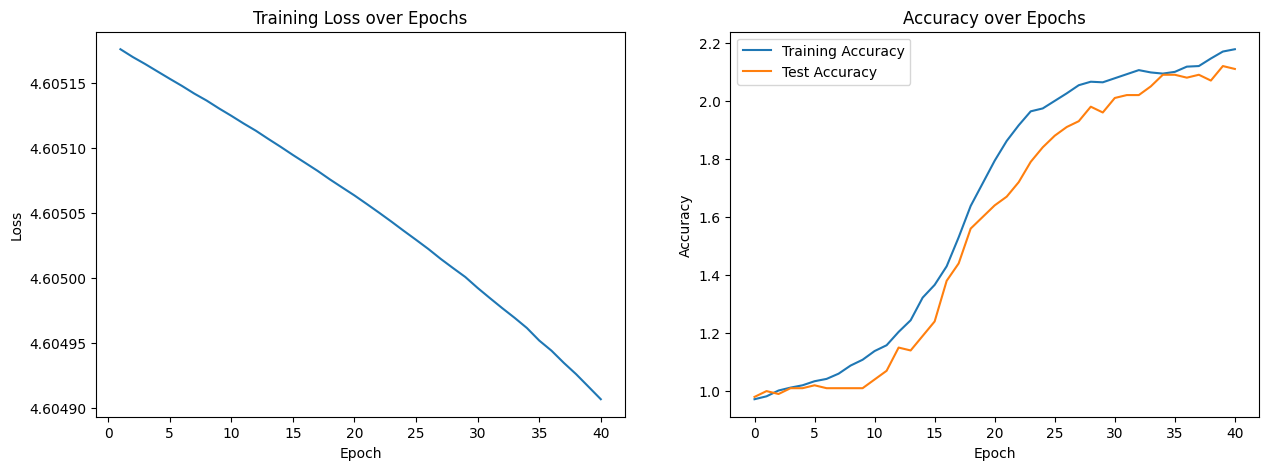

TRAINING TIME:  1506.3628270626068


In [ ]:
train_SGD(mlp_adv,trainloader,testloader,epochs=40,lr=((1e-2)))

Starting epoch 1
Epoch - Training loss: 4.604363645622116
Epoch - Evaluation: 1.0800000429153442
Starting epoch 2
Epoch - Training loss: 4.596057864720236
Epoch - Evaluation: 1.1699999570846558
Starting epoch 3
Epoch - Training loss: 4.578246317937703
Epoch - Evaluation: 1.600000023841858
Starting epoch 4
Epoch - Training loss: 4.531923301205664
Epoch - Evaluation: 3.2200000286102295
Starting epoch 5
Epoch - Training loss: 4.416299981271435
Epoch - Evaluation: 6.03000020980835
Starting epoch 6
Epoch - Training loss: 4.234032111967395
Epoch - Evaluation: 6.889999866485596
Starting epoch 7
Epoch - Training loss: 4.066979785165387
Epoch - Evaluation: 8.9399995803833
Starting epoch 8
Epoch - Training loss: 3.965523033798812
Epoch - Evaluation: 10.210000038146973
Starting epoch 9
Epoch - Training loss: 3.8971426030119023
Epoch - Evaluation: 11.289999961853027
Starting epoch 10
Epoch - Training loss: 3.8343862652064797
Epoch - Evaluation: 12.5
Starting epoch 11
Epoch - Training loss: 3.77280

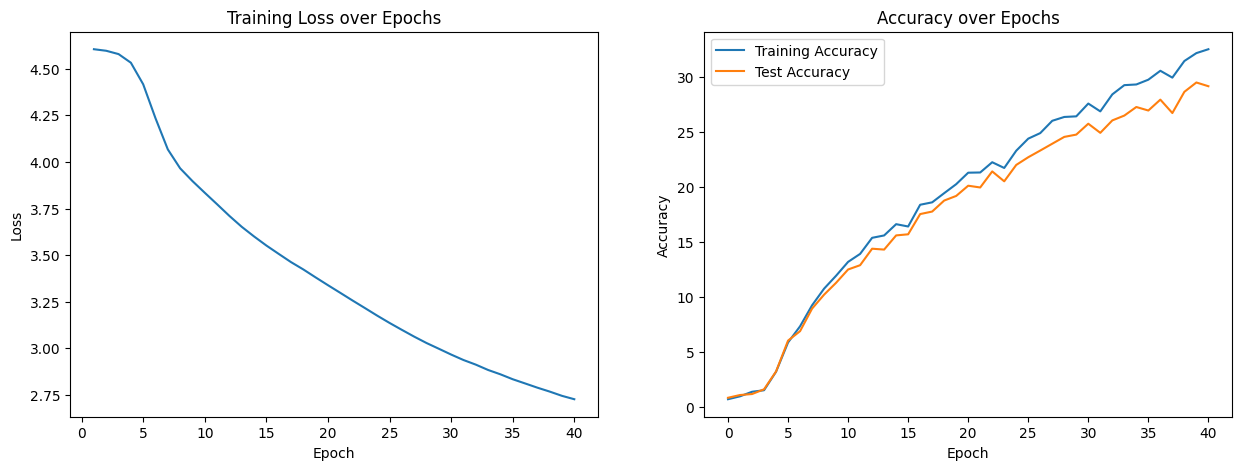

TRAINING TIME:  2386.186443567276


In [ ]:
train_SGD(conv,trainloader,testloader,epochs=40,lr=((1e-2)))

In [ ]:
print(evaluate(mlp,trainloader))

tensor(1.8740)


In [ ]:
print(evaluate(mlp_adv,trainloader))

tensor(2.1780)


In [ ]:
print(evaluate(conv,trainloader))

tensor(32.5360)
